In [1]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}', r'\usepackage{newtxmath}'] 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc
from cycler import cycler

mpl.rcParams['ps.usedistiller'] = 'xpdf' 

plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

monochrome=(cycler('color', sns.color_palette("husl", 8))*2+(cycler('marker', ['v', 's', "o"])*7)[0:16])
plt.rc('axes', prop_cycle=monochrome)

pd.options.display.max_rows = 999

In [3]:
# Replace this variable accordingly 
path_to_results = "../experiments/2019-10-16-21-03_PowerDiscrete_/"

In [5]:
masterdata = pd.read_csv(path_to_results + "PowerDiscrete.csv")

In [6]:
# simplify the refIds
extract = [x.split("-")[1:4] + [x.split("-")[5]] for x in masterdata["refId"]]
extract = [["ic"]+x[1::] if(x[0]=="independentcat") else x for x in extract]
extract = [["lc"]+x[1::] if(x[0]=="linearcat") else x for x in extract]
masterdata["noise"] = [x[2] for x in extract]
masterdata["noise"] = masterdata["noise"].astype(float)
masterdata["refId"] = ["-".join(x) for x in extract]

In [7]:
masterdata["ncats"] = [x[-1] for x in extract]
masterdata["ncats"] = masterdata["ncats"].astype(int)

In [8]:
masterdata["deptype"] = [x[0] for x in extract]

In [9]:
masterdata["deptype"].unique()

array(['lc', 'l'], dtype=object)

In [10]:
masterdata.head()

,refId,testId,ncols,avgprecpu,stdpre,avgruncpu,stdrun,avgcon,stdcon,power,noise,ncats,deptype
0,lc-2-0.0-2,MWP,2,3.647732,1.315521,0.740650,0.457237,1.000000,0.000000,1.000,0.0,2,lc
1,lc-2-0.0-2,MWPn,2,3.597330,1.293187,0.745048,0.456108,1.000000,0.000000,1.000,0.0,2,lc
2,lc-2-0.0-2,MWPu,2,3.617557,1.381327,1.230493,0.827929,1.000000,0.000000,1.000,0.0,2,lc
3,lc-2-0.0-2,KSP,2,3.312943,1.140432,0.706639,0.458042,0.928094,0.187886,0.817,0.0,2,lc
4,lc-2-0.0-2,KSPn,2,3.329021,1.228249,1.930680,0.666198,0.974764,0.115644,0.935,0.0,2,lc


In [11]:
masterdata["ncols"].unique()

array([ 2,  3,  5, 10, 20])

In [12]:
masterdata["testId"].unique()

array(['MWP', 'MWPn', 'MWPu', 'KSP', 'KSPn', 'KSPs', 'KSPsn', 'CSP', 'CSPn'], dtype=object)

In [13]:
masterdata["refId"].unique()

array(['lc-2-0.0-2', 'lc-2-0.0-20', 'lc-2-0.0-5', ..., 'l-20-1.0-0',
       'lc-20-1.0-1', 'l-20-1.0-1'], dtype=object)

In [14]:
masterdata["noise"].unique()

array([ 0.  ,  0.03,  0.07,  0.1 ,  0.13,  0.17,  0.2 ,  0.23,  0.27,
        0.3 ,  0.33,  0.37,  0.4 ,  0.43,  0.47,  0.5 ,  0.53,  0.57,
        0.6 ,  0.63,  0.67,  0.7 ,  0.73,  0.77,  0.8 ,  0.83,  0.87,
        0.9 ,  0.93,  0.97,  1.  ])

<IPython.core.display.Javascript object>


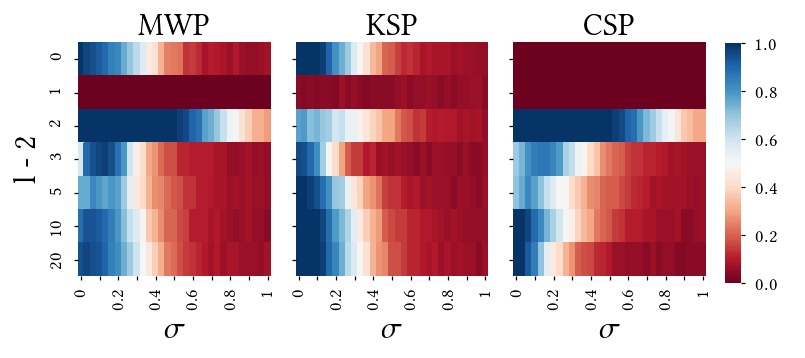

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


<IPython.core.display.Javascript object>


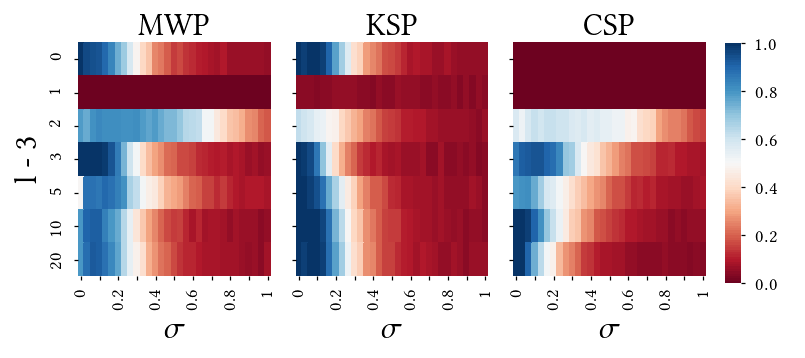

<IPython.core.display.Javascript object>


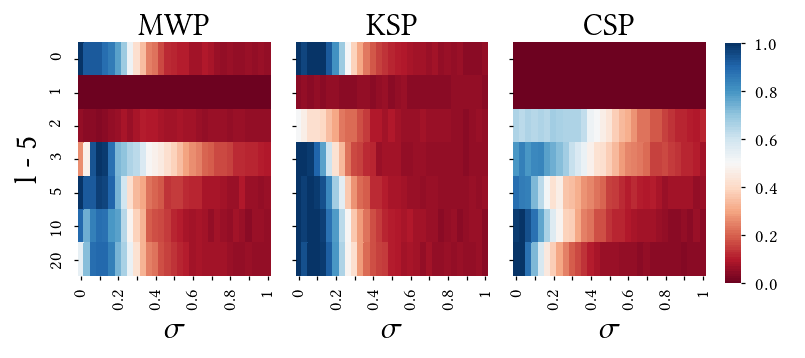

<IPython.core.display.Javascript object>


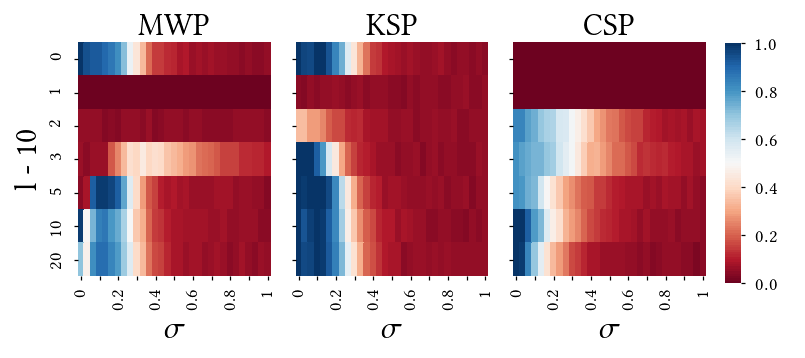

<IPython.core.display.Javascript object>


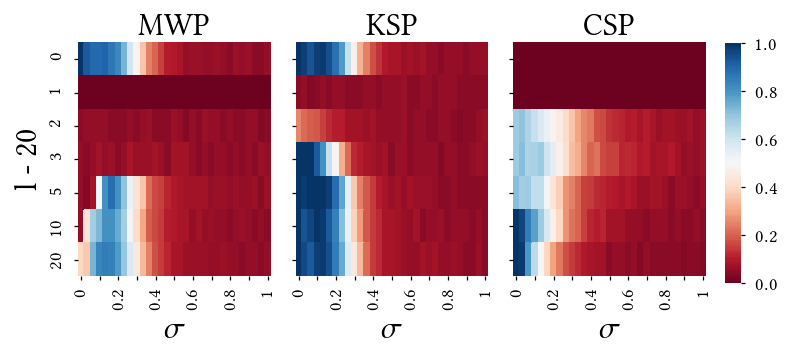

In [17]:
%matplotlib notebook


for ndim in masterdata["ncols"].unique():
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,4), sharey=True, sharex=True)
    axess = axes.reshape(-1)
    cbar_ax1 = fig.add_axes([.90, 0.21, .02, 0.67])
    measure = "power"
    deptype="l"

    for i,test in enumerate(['MWP', 'KSP', 'CSP']):
        ax = axess[i]
        subdata = masterdata[(masterdata["testId"] == test) & (masterdata["ncols"] == ndim) & (masterdata["deptype"] == deptype)]
        d = subdata.groupby(["noise","ncats"]).mean()[measure].reset_index()
        dd = d.set_index(["noise", "ncats"]).unstack("noise")
        dd.columns = dd.columns.droplevel(0)

        plt.sca(axess[i])
        sns.heatmap(dd, vmin=0.0, vmax=1, cmap=sns.color_palette("RdBu", 100), ax = ax, 
                        xticklabels=3,
                        cbar=True,#i == 0, 
                    cbar_ax=cbar_ax1)
        plt.title("%s"%(test))
        if(i == 0):
            plt.ylabel("%s - %s"%(deptype, ndim))
        else:
            plt.ylabel("")
            
        labels = [format(float(x.get_text()), '.1f') for x in ax.get_xticklabels()]
        labels[0] = "0"
        labels[-1] = "1"
        for x in range(1, len(labels), 2):
            labels[x] = ""
        ax.set_xticklabels(labels)
        
        ax.set_xlabel('$\sigma$')

    plt.tight_layout(rect=[0, 0, .9, 1])

<IPython.core.display.Javascript object>


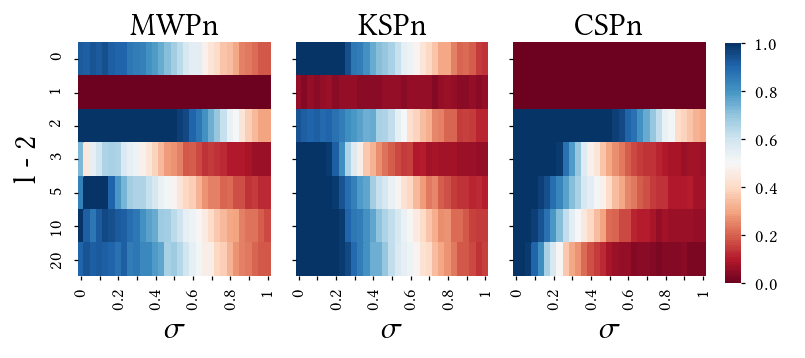

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


<IPython.core.display.Javascript object>


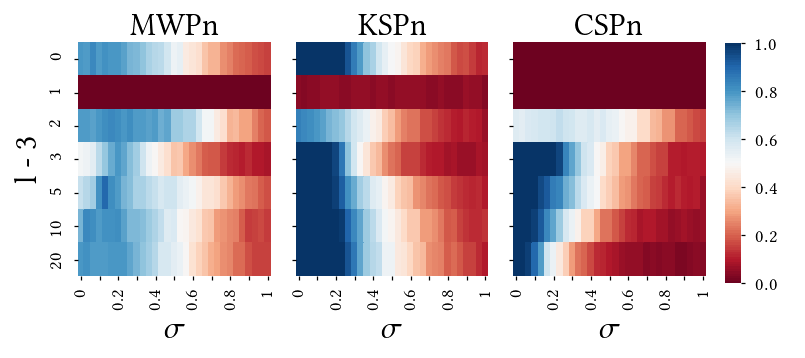

<IPython.core.display.Javascript object>


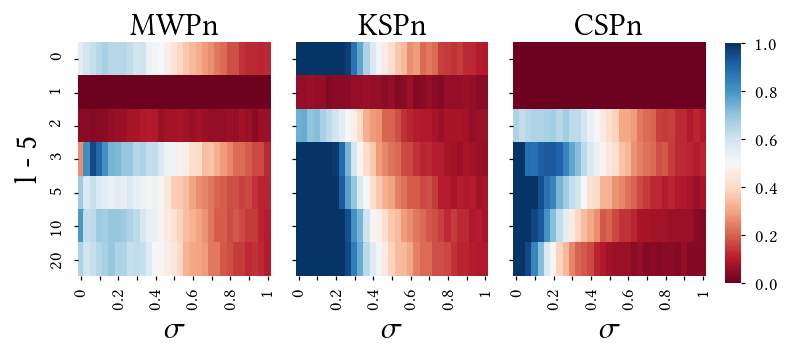

<IPython.core.display.Javascript object>


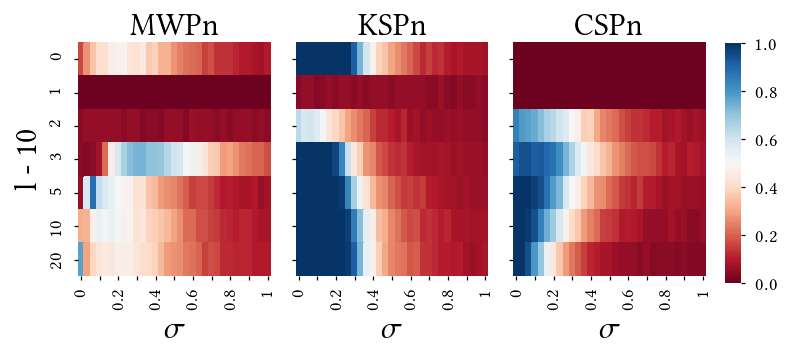

<IPython.core.display.Javascript object>


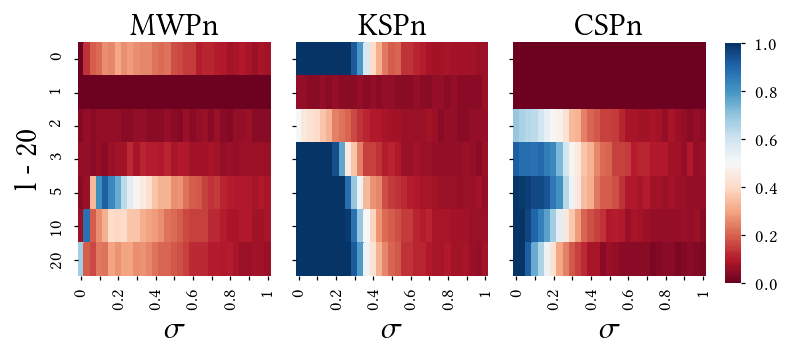

In [18]:
%matplotlib notebook

for ndim in masterdata["ncols"].unique():
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,4), sharey=True, sharex=True)
    axess = axes.reshape(-1)
    cbar_ax1 = fig.add_axes([.90, 0.21, .02, 0.67])
    measure = "power"
    deptype="l"

    for i,test in enumerate(['MWPn', 'KSPn', 'CSPn']):
        ax = axess[i]
        subdata = masterdata[(masterdata["testId"] == test) & (masterdata["ncols"] == ndim) & (masterdata["deptype"] == deptype)]
        d = subdata.groupby(["noise","ncats"]).mean()[measure].reset_index()
        dd = d.set_index(["noise", "ncats"]).unstack("noise")
        dd.columns = dd.columns.droplevel(0)

        plt.sca(axess[i])
        sns.heatmap(dd, vmin=0.0, vmax=1, cmap=sns.color_palette("RdBu", 100), ax = ax, 
                        xticklabels=3,
                        cbar=True,#i == 0, 
                    cbar_ax=cbar_ax1)
        plt.title("%s"%(test))
        if(i == 0):
            plt.ylabel("%s - %s"%(deptype, ndim))
        else:
            plt.ylabel("")
            
        labels = [format(float(x.get_text()), '.1f') for x in ax.get_xticklabels()]
        labels[0] = "0"
        labels[-1] = "1"
        for x in range(1, len(labels), 2):
            labels[x] = ""
        ax.set_xticklabels(labels)
        
        ax.set_xlabel('$\sigma$')

    plt.tight_layout(rect=[0, 0, .9, 1])

<IPython.core.display.Javascript object>


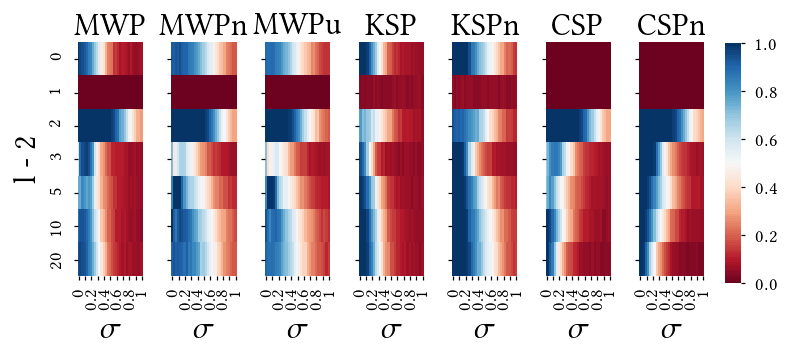

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


<IPython.core.display.Javascript object>


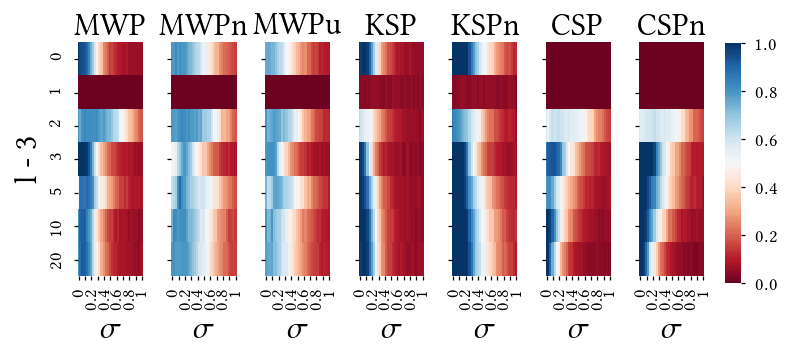

<IPython.core.display.Javascript object>


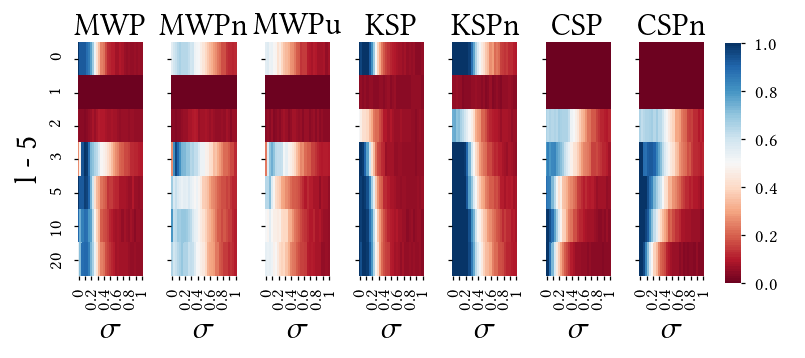

<IPython.core.display.Javascript object>


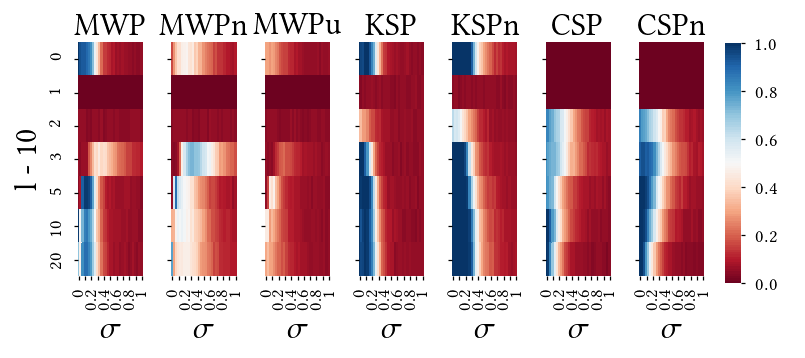

<IPython.core.display.Javascript object>


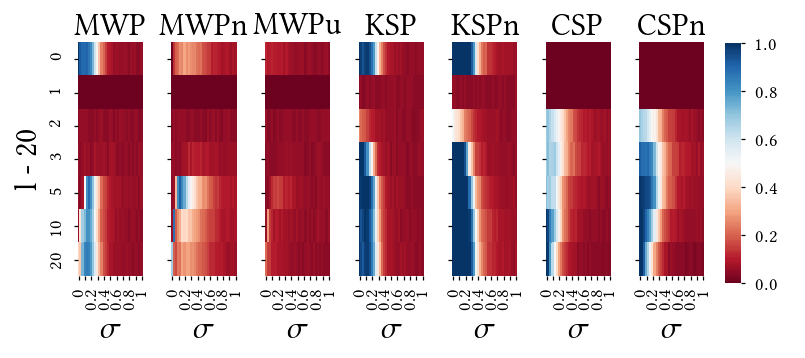

In [19]:
%matplotlib notebook


for ndim in masterdata["ncols"].unique():
    fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(9,4), sharey=True, sharex=True)
    axess = axes.reshape(-1)
    cbar_ax1 = fig.add_axes([.90, 0.21, .02, 0.67])
    measure = "power"
    deptype="l"

    for i,test in enumerate(['MWP', 'MWPn', 'MWPu', 'KSP', 'KSPn', 'CSP', 'CSPn']):
        ax = axess[i]
        subdata = masterdata[(masterdata["testId"] == test) & (masterdata["ncols"] == ndim) & (masterdata["deptype"] == deptype)]
        d = subdata.groupby(["noise","ncats"]).mean()[measure].reset_index()
        dd = d.set_index(["noise", "ncats"]).unstack("noise")
        dd.columns = dd.columns.droplevel(0)

        plt.sca(axess[i])
        sns.heatmap(dd, vmin=0.0, vmax=1, cmap=sns.color_palette("RdBu", 100), ax = ax, 
                        xticklabels=3,
                        cbar=True,#i == 0, 
                    cbar_ax=cbar_ax1)
        plt.title("%s"%(test))
        if(i == 0):
            plt.ylabel("%s - %s"%(deptype, ndim))
        else:
            plt.ylabel("")
            
        labels = [format(float(x.get_text()), '.1f') for x in ax.get_xticklabels()]
        labels[0] = "0"
        labels[-1] = "1"
        for x in range(1, len(labels), 2):
            labels[x] = ""
        ax.set_xticklabels(labels)
        
        ax.set_xlabel('$\sigma$')

    plt.tight_layout(rect=[0, 0, .9, 1])

<IPython.core.display.Javascript object>


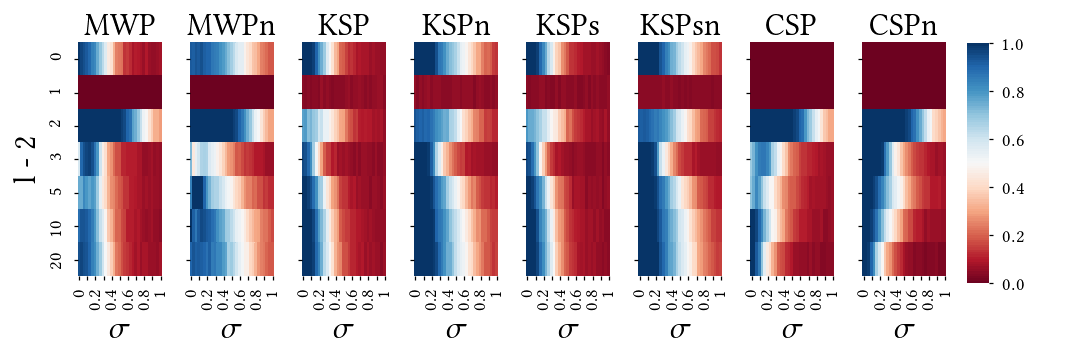

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


<IPython.core.display.Javascript object>


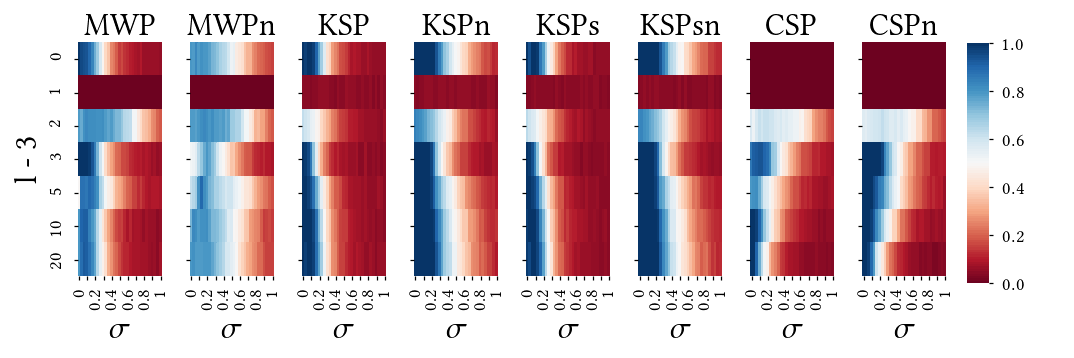

<IPython.core.display.Javascript object>


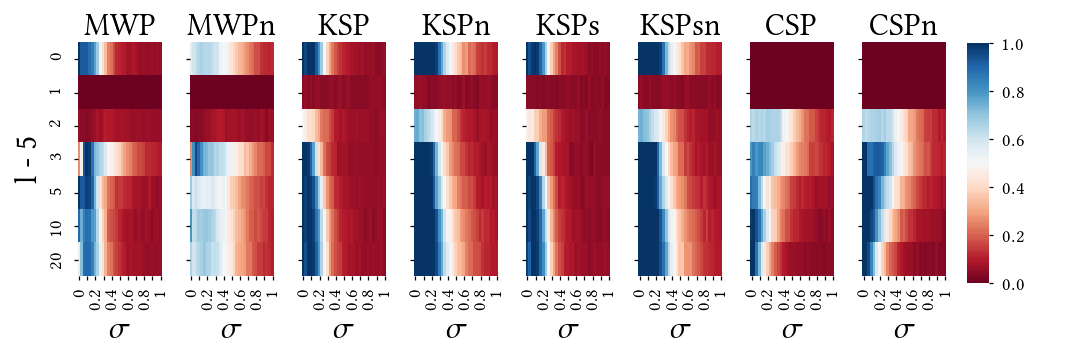

<IPython.core.display.Javascript object>


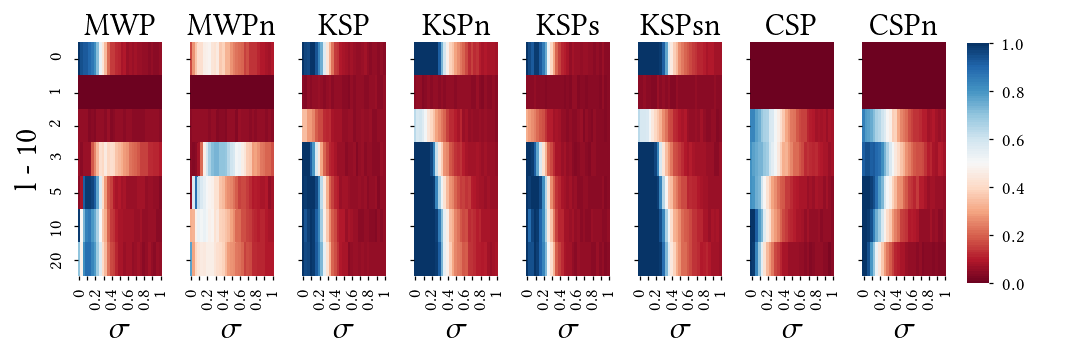

<IPython.core.display.Javascript object>


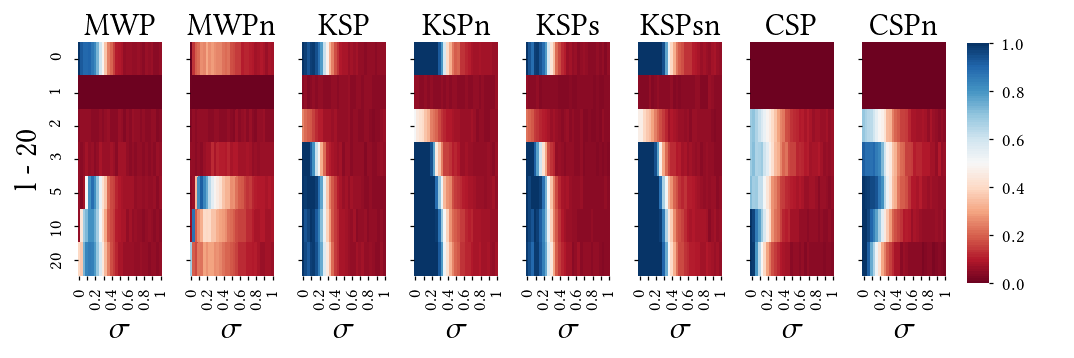

In [20]:
%matplotlib notebook

tests = ['MWP', 'MWPn', 'KSP', 'KSPn', 'KSPs', 'KSPsn', 'CSP', 'CSPn']


for ndim in masterdata["ncols"].unique():
    fig, axes = plt.subplots(nrows=1, ncols=len(tests), figsize=(12,4), sharey=True, sharex=True)
    axess = axes.reshape(-1)
    cbar_ax1 = fig.add_axes([.90, 0.21, .02, 0.67])
    measure = "power"
    deptype="l"

    for i,test in enumerate(tests):
        ax = axess[i]
        subdata = masterdata[(masterdata["testId"] == test) & (masterdata["ncols"] == ndim) & (masterdata["deptype"] == deptype)]
        d = subdata.groupby(["noise","ncats"]).mean()[measure].reset_index()
        dd = d.set_index(["noise", "ncats"]).unstack("noise")
        dd.columns = dd.columns.droplevel(0)

        plt.sca(axess[i])
        sns.heatmap(dd, vmin=0.0, vmax=1, cmap=sns.color_palette("RdBu", 100), ax = ax, 
                        xticklabels=3,
                        cbar=True,#i == 0, 
                    cbar_ax=cbar_ax1)
        plt.title("%s"%(test))
        if(i == 0):
            plt.ylabel("%s - %s"%(deptype, ndim))
        else:
            plt.ylabel("")
            
        labels = [format(float(x.get_text()), '.1f') for x in ax.get_xticklabels()]
        labels[0] = "0"
        labels[-1] = "1"
        for x in range(1, len(labels), 2):
            labels[x] = ""
        ax.set_xticklabels(labels)
        
        ax.set_xlabel('$\sigma$')

    plt.tight_layout(rect=[0, 0, .9, 1])

In [21]:
masterdata.groupby("testId").mean()

,ncols,avgprecpu,stdpre,avgruncpu,stdrun,avgcon,stdcon,power,noise,ncats
testId,,,,,,,,,,
CSP,8.0,11.958251,5.143248,5.232351,2.568383,0.565740,0.202468,0.251047,0.5,6.307692
CSPn,8.0,11.917586,5.126233,4.701878,2.340145,0.550518,0.183716,0.299352,0.5,6.307692
KSP,8.0,9.067238,4.253076,0.767908,0.447415,0.616136,0.265641,0.229486,0.5,6.307692
KSPn,8.0,9.059084,4.252960,1.553269,0.829488,0.682507,0.238556,0.333200,0.5,6.307692
KSPs,8.0,9.068832,4.270120,0.702892,0.418940,0.596339,0.271217,0.221499,0.5,6.307692
KSPsn,8.0,9.053367,4.255342,0.740005,0.433857,0.669747,0.243339,0.326747,0.5,6.307692
MWP,8.0,9.869901,4.431512,3.608345,2.390602,0.546710,0.229432,0.237798,0.5,6.307692
MWPn,8.0,9.828326,4.427034,3.601498,2.383906,0.565875,0.234503,0.265418,0.5,6.307692
MWPu,8.0,9.813610,4.416750,5.402855,3.287080,0.516677,0.240877,0.186258,0.5,6.307692


In [22]:
masterdata["testId"].unique()

array(['MWP', 'MWPn', 'MWPu', 'KSP', 'KSPn', 'KSPs', 'KSPsn', 'CSP', 'CSPn'], dtype=object)

<IPython.core.display.Javascript object>


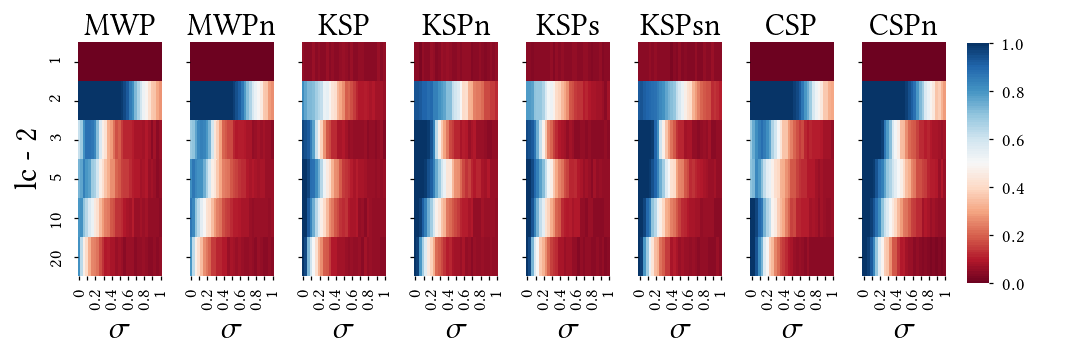

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


<IPython.core.display.Javascript object>


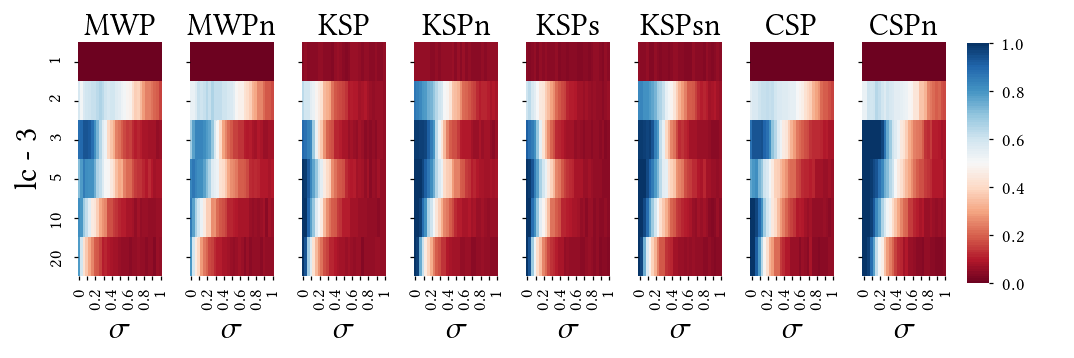

<IPython.core.display.Javascript object>


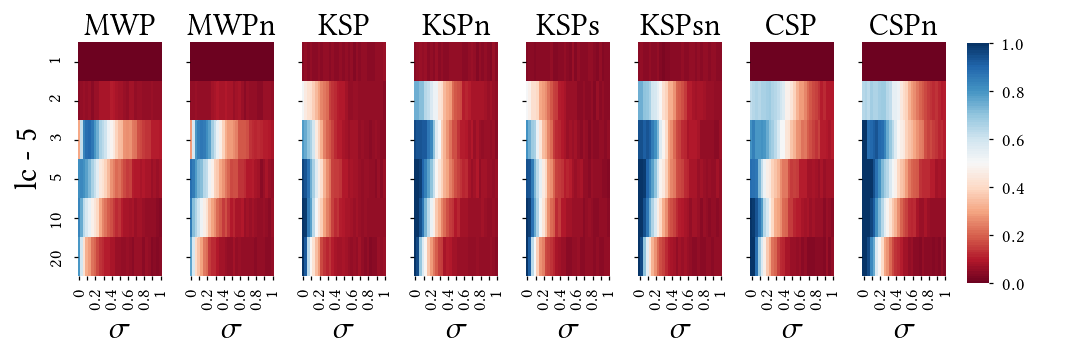

<IPython.core.display.Javascript object>


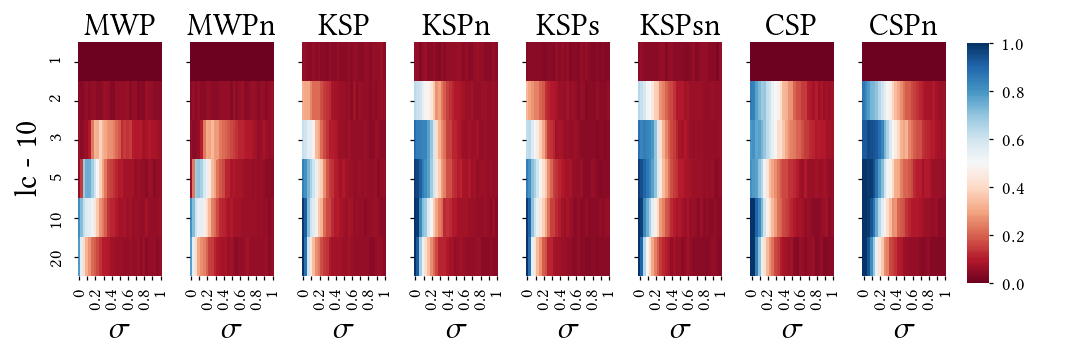

<IPython.core.display.Javascript object>


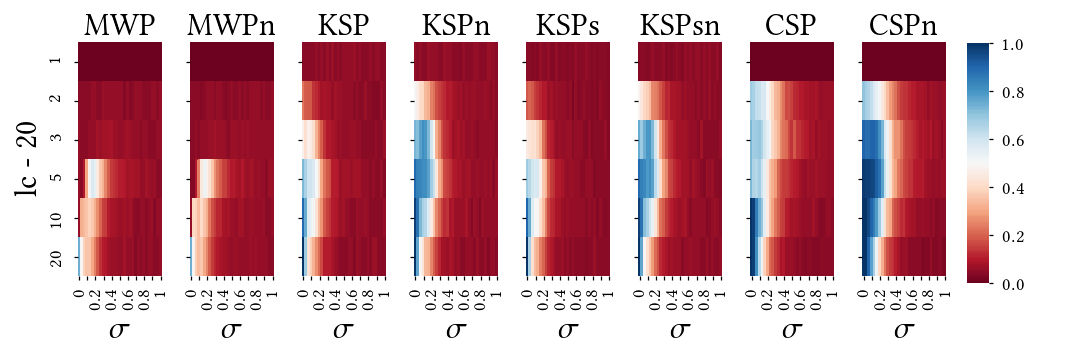

In [23]:
%matplotlib notebook

tests = ['MWP', 'MWPn', 'KSP', 'KSPn', 'KSPs', 'KSPsn', 'CSP', 'CSPn']


for ndim in masterdata["ncols"].unique():
    fig, axes = plt.subplots(nrows=1, ncols=len(tests), figsize=(12,4), sharey=True, sharex=True)
    axess = axes.reshape(-1)
    cbar_ax1 = fig.add_axes([.90, 0.21, .02, 0.67])
    measure = "power"
    deptype="lc"

    for i,test in enumerate(tests):
        ax = axess[i]
        subdata = masterdata[(masterdata["testId"] == test) & (masterdata["ncols"] == ndim) & (masterdata["deptype"] == deptype)]
        d = subdata.groupby(["noise","ncats"]).mean()[measure].reset_index()
        dd = d.set_index(["noise", "ncats"]).unstack("noise")
        dd.columns = dd.columns.droplevel(0)

        plt.sca(axess[i])
        sns.heatmap(dd, vmin=0.0, vmax=1, cmap=sns.color_palette("RdBu", 100), ax = ax, 
                        xticklabels=3,
                        cbar=True,#i == 0, 
                    cbar_ax=cbar_ax1)
        plt.title("%s"%(test))
        if(i == 0):
            plt.ylabel("%s - %s"%(deptype, ndim))
        else:
            plt.ylabel("")
            
        labels = [format(float(x.get_text()), '.1f') for x in ax.get_xticklabels()]
        labels[0] = "0"
        labels[-1] = "1"
        for x in range(1, len(labels), 2):
            labels[x] = ""
        ax.set_xticklabels(labels)
        
        ax.set_xlabel('$\sigma$')

    plt.tight_layout(rect=[0, 0, .9, 1])

In [24]:
prettynames = {
    "MWP" : "MWP",
    "MWPn": "MWP$^n$",
    "KSP" : "KSP",
    "KSPn": "KSP$^n$",
    "CSP" : "CSP",
    "CSPn": "CSP$^n$",
    "l" : "L",
    "lc" : "L$^*$"
}

<IPython.core.display.Javascript object>


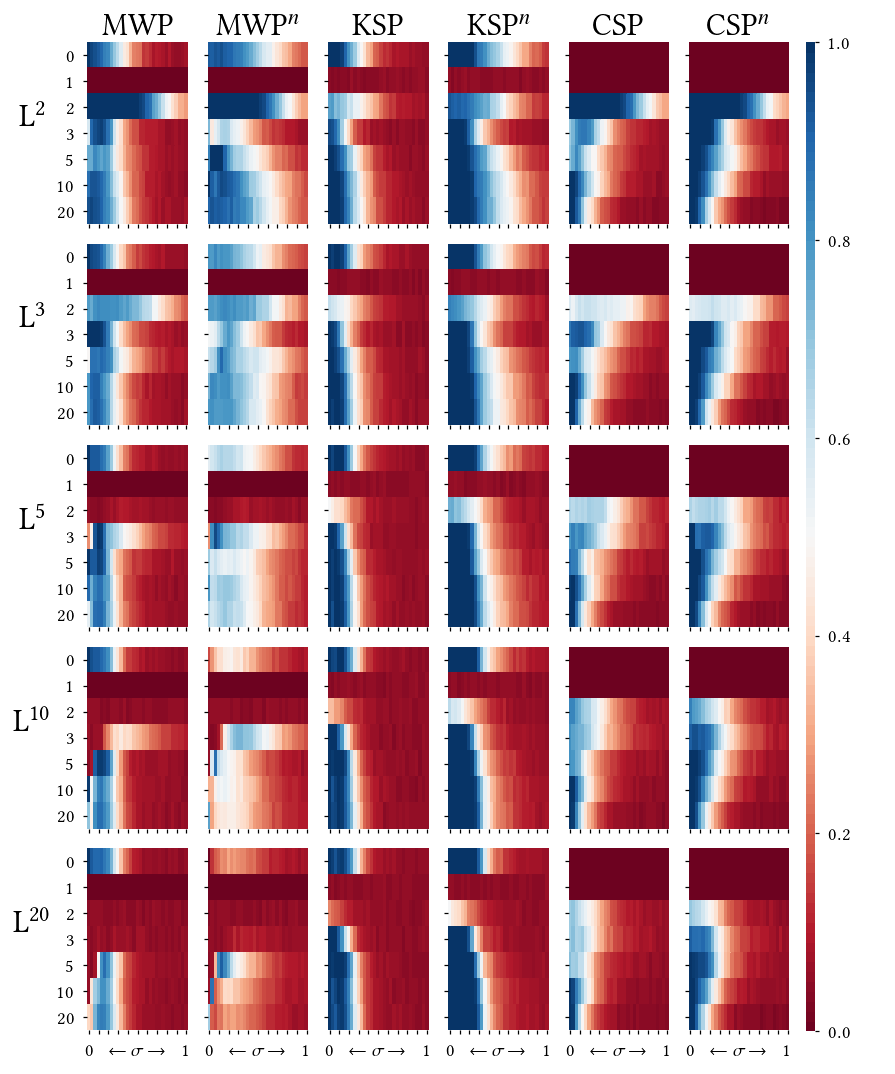

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "
/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [25]:
%matplotlib notebook

tests = ['MWP', 'MWPn', 'KSP', 'KSPn', 'CSP', 'CSPn']

fig, axes = plt.subplots(nrows=len(masterdata["ncols"].unique()), ncols=len(tests), figsize=(10,12), sharey=True, sharex=True)
axess = axes.reshape(-1)

i = 0
for ndim in masterdata["ncols"].unique():
    cbar_ax1 = fig.add_axes([.90, 0.04, .01, 0.92])
    measure = "power"
    deptype="l"

    for test in tests:
        ax = axess[i]
        subdata = masterdata[(masterdata["testId"] == test) & (masterdata["ncols"] == ndim) & (masterdata["deptype"] == deptype)]
        d = subdata.groupby(["noise","ncats"]).mean()[measure].reset_index()
        dd = d.set_index(["noise", "ncats"]).unstack("noise")
        dd.columns = dd.columns.droplevel(0)

        plt.sca(axess[i])
        
        sns.heatmap(dd, vmin=0.0, vmax=1, cmap=sns.color_palette("RdBu", 100), ax = ax, 
                        xticklabels=3,
                        cbar=True,
                    cbar_ax=cbar_ax1)
        
        if(i < len(tests)):
            plt.title("%s"%(prettynames[test]))
        
        if((i % len(tests)) == 0):
            plt.ylabel("%s$^{%s}$"%(prettynames[deptype], ndim),  rotation=0, labelpad=20)
            ax.set_yticklabels(ax.get_yticklabels(),  rotation=0)
        else:
            plt.ylabel("")
            
        labels = ["" for x in ax.get_xticklabels()]
        labels[0] = "0"
        labels[-1] = "1"
        labels[5] = r"$\sigma$"
        labels[3] = r"$\leftarrow$"
        labels[7] = r"$\rightarrow$"
        
        ax.set_xticklabels(labels,  rotation=0)
        
        ax.set_xlabel('', labelpad=0)
        i = i+1

    plt.tight_layout(rect=[0, 0, .9, 1])
    
#plt.savefig("power_L.pdf")

<IPython.core.display.Javascript object>


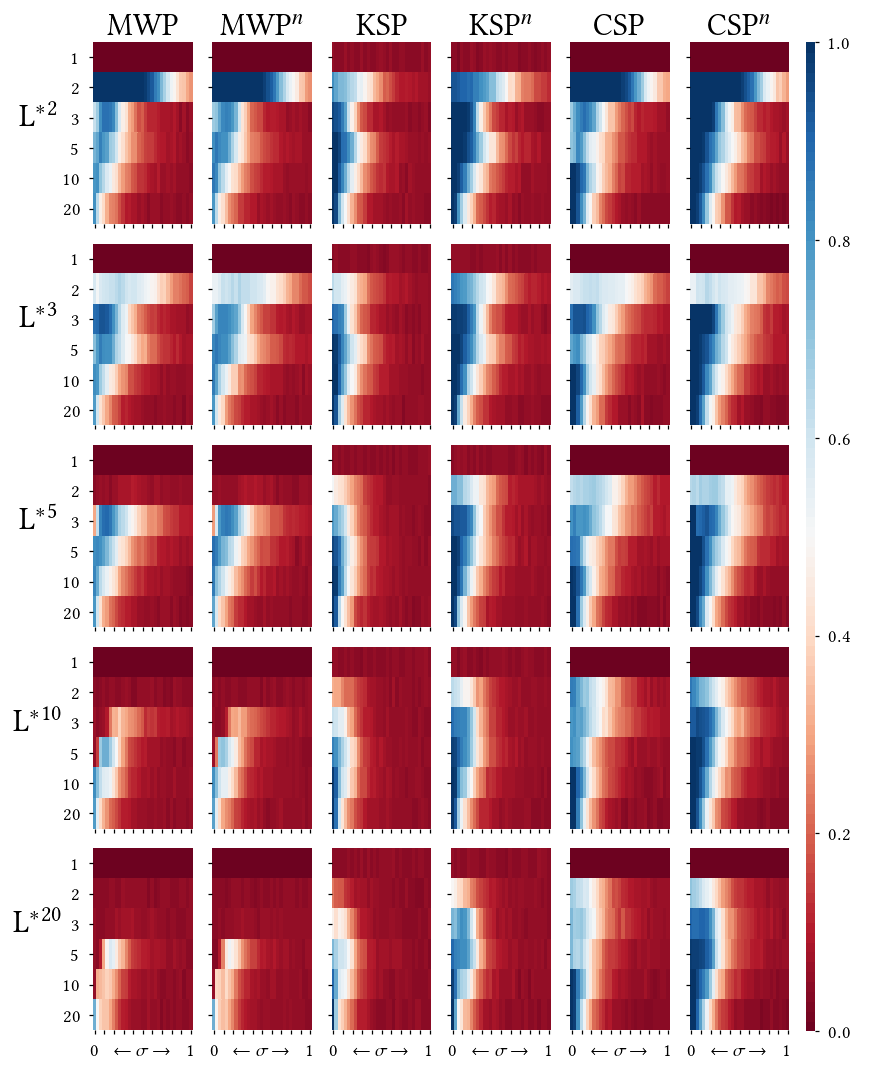

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [26]:
%matplotlib notebook

tests = ['MWP', 'MWPn', 'KSP', 'KSPn', 'CSP', 'CSPn']

fig, axes = plt.subplots(nrows=len(masterdata["ncols"].unique()), ncols=len(tests), figsize=(10,12), sharey=True, sharex=True)
axess = axes.reshape(-1)

i = 0
for ndim in masterdata["ncols"].unique():
    cbar_ax1 = fig.add_axes([.90, 0.04, .01, 0.92])
    measure = "power"
    deptype="lc"

    for test in tests:
        ax = axess[i]
        subdata = masterdata[(masterdata["testId"] == test) & (masterdata["ncols"] == ndim) & (masterdata["deptype"] == deptype)]
        d = subdata.groupby(["noise","ncats"]).mean()[measure].reset_index()
        dd = d.set_index(["noise", "ncats"]).unstack("noise")
        dd.columns = dd.columns.droplevel(0)

        plt.sca(axess[i])
        
        sns.heatmap(dd, vmin=0.0, vmax=1, cmap=sns.color_palette("RdBu", 100), ax = ax, 
                        xticklabels=3,
                        cbar=True,
                    cbar_ax=cbar_ax1)
        
        if(i < len(tests)):
            plt.title("%s"%(prettynames[test]))
        
        if((i % len(tests)) == 0):
            plt.ylabel("%s$^{%s}$"%(prettynames[deptype], ndim),  rotation=0, labelpad=20)
            ax.set_yticklabels(ax.get_yticklabels(),  rotation=0)
        else:
            plt.ylabel("")
            
        labels = ["" for x in ax.get_xticklabels()]
        labels[0] = "0"
        labels[-1] = "1"
        labels[5] = r"$\sigma$"
        labels[3] = r"$\leftarrow$"
        labels[7] = r"$\rightarrow$"
        
        ax.set_xticklabels(labels,  rotation=0)
        
        ax.set_xlabel('', labelpad=0)
        i = i+1

    plt.tight_layout(rect=[0, 0, .90, 1])

#plt.savefig("power_Lc.pdf")

In [27]:
prettynames = {
    "MWP" : "MWP, w/ MR",
    "MWPn": "MWP, w/o MR",
    "KSP" : "KSP",
    "KSPn": "KSP",
    "CSP" : "CSP",
    "CSPn": "CSP",
    "l" : "L",
    "lc" : "L$^*$"
}

In [28]:
masterdata["ncats"].unique()

array([ 2, 20,  5,  3, 10,  1,  0])

In [29]:
masterdata["ncols"].unique()

array([ 2,  3,  5, 10, 20])

# Figure 5: Power against continuous and discrete linear distributions

<IPython.core.display.Javascript object>


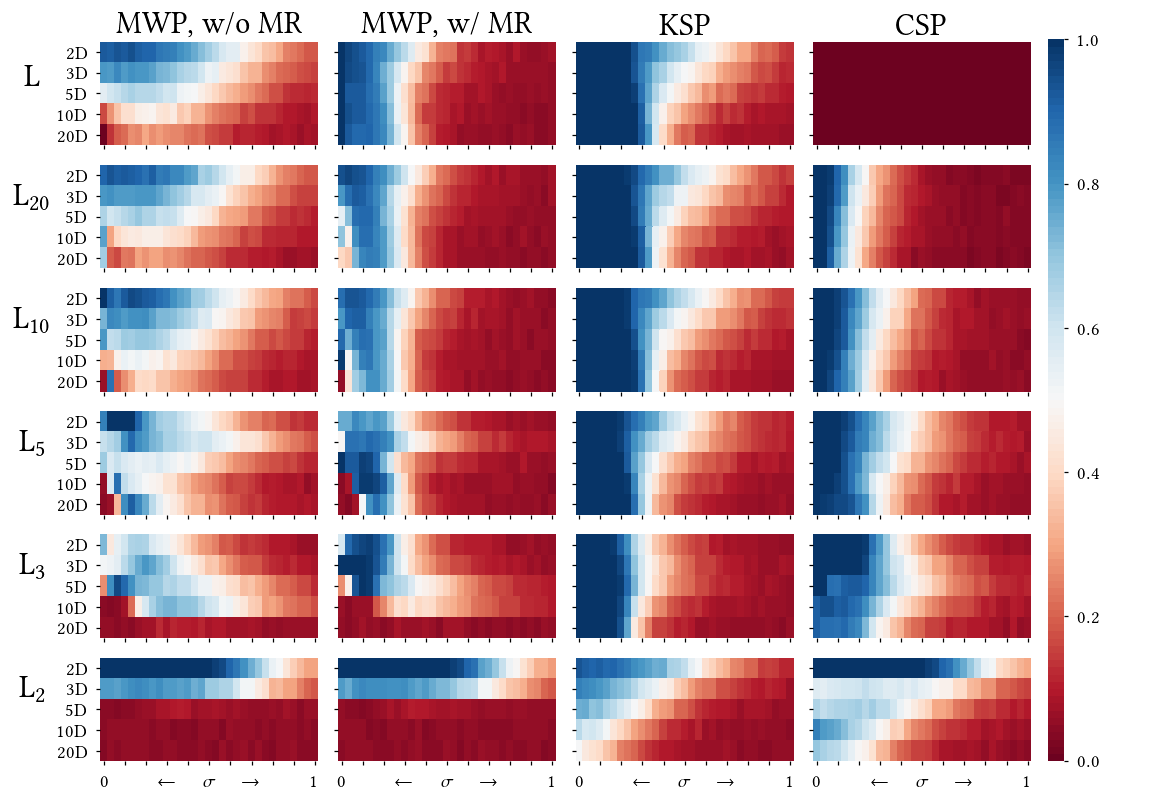

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [30]:
%matplotlib notebook

tests = ['MWPn', 'MWP', 'KSPn', 'CSPn']

fig, axes = plt.subplots(nrows=6, ncols=len(tests), figsize=(13,9), sharey=True, sharex=True)
axess = axes.reshape(-1)

i = 0

for ncat in [0, 20,  10,  5, 3, 2]:
    cbar_ax1 = fig.add_axes([.90, 0.055, .014, 0.895])
    measure = "power"
    deptype="l"

    for test in tests:
        ax = axess[i]
        subdata = masterdata[(masterdata["testId"] == test) & (masterdata["ncats"] == ncat) & (masterdata["deptype"] == deptype)]
        d = subdata.groupby(["noise","ncols"]).mean()[measure].reset_index()
        dd = d.set_index(["noise", "ncols"]).unstack("noise")
        dd.columns = dd.columns.droplevel(0)

        plt.sca(axess[i])
        
        sns.heatmap(dd, vmin=0.0, vmax=1, cmap=sns.color_palette("RdBu", 100), ax = ax, 
                        xticklabels=3,
                        cbar=True, 
                    cbar_ax=cbar_ax1)
        
        if(i < len(tests)):
            plt.title("%s"%(prettynames[test]))
        
        if((i % len(tests)) == 0):
            if(ncat == 0):
                plt.ylabel("%s"%(prettynames[deptype]),  rotation=0, labelpad=20)
            else:
                plt.ylabel("%s$_{%s}$"%(prettynames[deptype], ncat),  rotation=0, labelpad=20)
            ax.set_yticklabels(ax.get_yticklabels(),  rotation=0)
        else:
            plt.ylabel("")
            
        labels = ["" for x in ax.get_xticklabels()]
        labels[0] = "0"
        labels[-1] = "1"
        labels[5] = r"$\sigma$"
        labels[3] = r"$\leftarrow$"
        labels[7] = r"$\rightarrow$"
        
        ax.set_yticks([0.5,1.5,2.5,3.5,4.5])
        ax.set_yticklabels([r"$2$D", r"$3$D", r"$5$D", r"$10$D", r"$20$D"], ha='right')
        yax = ax.get_yaxis()
        
        ax.set_xticklabels(labels,  rotation=0)
        
        ax.set_xlabel('', labelpad=0)
        i = i+1

    plt.tight_layout(rect=[0, 0, .9, 1])
    
plt.savefig("plots/Fig5.pdf")

<IPython.core.display.Javascript object>


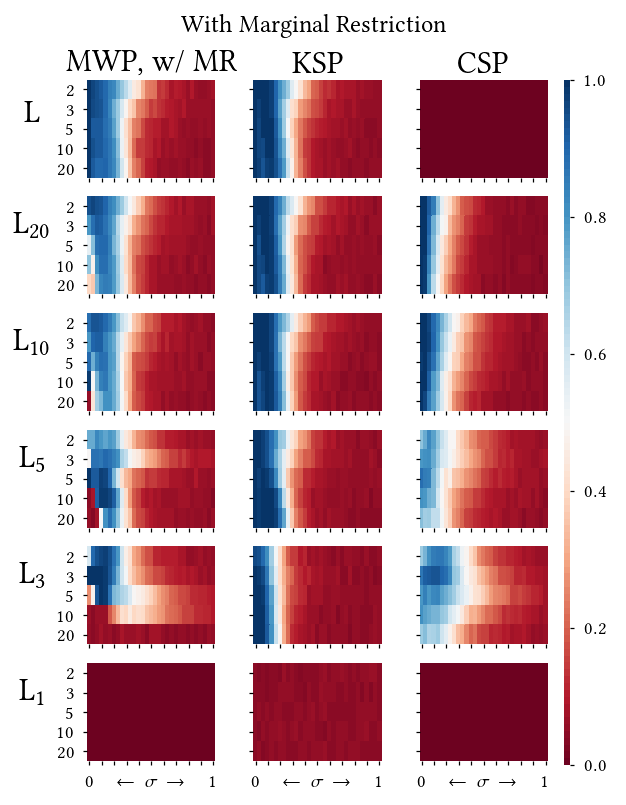

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [31]:
%matplotlib notebook

tests = ['MWP', 'KSP', 'CSP']

fig, axes = plt.subplots(nrows=6, ncols=len(tests), figsize=(7,9), sharey=True, sharex=True)
axess = axes.reshape(-1)

i = 0

for ncat in [0, 20,  10,  5, 3, 1]:
    cbar_ax1 = fig.add_axes([.90, 0.05, .01, 0.85])
    measure = "power"
    deptype="l"

    for test in tests:
        ax = axess[i]
        subdata = masterdata[(masterdata["testId"] == test) & (masterdata["ncats"] == ncat) & (masterdata["deptype"] == deptype)]
        d = subdata.groupby(["noise","ncols"]).mean()[measure].reset_index()
        dd = d.set_index(["noise", "ncols"]).unstack("noise")
        dd.columns = dd.columns.droplevel(0)

        plt.sca(axess[i])
        
        sns.heatmap(dd, vmin=0.0, vmax=1, cmap=sns.color_palette("RdBu", 100), ax = ax, 
                        xticklabels=3,
                        cbar=True,
                    cbar_ax=cbar_ax1)
        
        if(i < len(tests)):
            plt.title("%s"%(prettynames[test]))
        
        if((i % len(tests)) == 0):
            if(ncat == 0):
                plt.ylabel("%s"%(prettynames[deptype]),  rotation=0, labelpad=20)
            else:
                plt.ylabel("%s$_{%s}$"%(prettynames[deptype], ncat),  rotation=0, labelpad=20)
            ax.set_yticklabels(ax.get_yticklabels(),  rotation=0)
        else:
            plt.ylabel("")
            
        labels = ["" for x in ax.get_xticklabels()]
        labels[0] = "0"
        labels[-1] = "1"
        labels[5] = r"$\sigma$"
        labels[3] = r"$\leftarrow$"
        labels[7] = r"$\rightarrow$"
        
        ax.set_yticks([0.5,1.5,2.5,3.5,4.5])
        ax.set_yticklabels(["2", "3", "5", "10", "20"])
        
        ax.set_xticklabels(labels,  rotation=0)
        
        ax.set_xlabel('', labelpad=0)
        i = i+1

    plt.tight_layout(rect=[0, 0, .9, 1])
    
fig.suptitle('With Marginal Restriction', fontsize=20) 
fig.subplots_adjust(top=0.90)

#plt.savefig("power_L_marginal.pdf")